# Project topic: Restaurant Popularity Analysis Using Yelp Reviews<br/>
- __BIA-660-Group 7__<br/>
- __Instructor: Prof. Rong Liu__<br/>
- Group member: Honyi Chen, Tingyi Lu, Junhan Zhou, Xiaomin Yang<br/>
- 2019 Spring

# Part 1 - Web Scrapping

- The Web Scraping part is in the other notebook __Web_Scraping_New_V1.ipynb__

# Part 2 - EDA

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import nltk
#nltk.download()
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
from wordcloud import WordCloud
import datetime

import string
import collections

from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
#from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

#Kmeans Cluster
from nltk.cluster import KMeansClusterer, \
cosine_distance

import regex as re   

# plot charts inline
%matplotlib inline

## import rawData

In [2]:
df = pd.read_csv('yelp_review_raw_data.csv')
df.head()
df.info() # get detailed information of each column 
df.describe()
print( "\nThere are {} observations in this dataset. \n".format(df.shape[0]))

Restaurant_Name                                             review  Score  \
0       Ippudo NY  This place is awesome.. i love the soup broth,...      5   
1       Ippudo NY  Ramen noodles are good, the pork bunds are so ...      4   
2       Ippudo NY  Go early before the line starts backing up.  T...      3   
3       Ippudo NY  I came at around 7:20pm on a Sunday evening an...      5   
4       Ippudo NY  This is my favorite ramen spot in the city. Th...      5   

  review_date  
0   4/23/2019  
1    5/3/2019  
2   4/24/2019  
3   4/22/2019  
4   4/16/2019

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19720 entries, 0 to 19719
Data columns (total 4 columns):
Restaurant_Name    19720 non-null object
review             19720 non-null object
Score              19720 non-null int64
review_date        19720 non-null object
dtypes: int64(1), object(3)
memory usage: 616.4+ KB


Score
count  19720.000000
mean       4.001724
std        1.067572
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000


There are 19720 observations in this dataset. 



## Compute summary statistics for all restaurants

In [3]:
restaurant = df.groupby("Restaurant_Name")
restaurant.describe()

Score                        \
                                              count   mean       std  min   
Restaurant_Name                                                             
Artichoke Basille's Pizza                     680.0  4.300  1.005727  1.0   
Beauty & Essex                                680.0  3.900  1.579135  1.0   
Buddakan                                      680.0  4.350  0.654316  3.0   
Cafe Habana                                   680.0  4.200  1.030321  2.0   
Cafeteria                                     680.0  3.550  1.396556  1.0   
Carmine's Italian Restaurant - Times Square   680.0  4.450  0.805266  2.0   
Eataly NYC Flatiron                           680.0  4.000  1.225646  1.0   
Ess-a-Bagel                                   680.0  4.300  0.843235  3.0   
Grimaldi's Pizzeria                           680.0  3.600  1.020555  1.0   
Ippudo NY                                     680.0  4.200  1.030321  2.0   
Ippudo Westside                               680.0  4.450  0.669447  3.0   
Jacob's Pickles                               680.0  4.100  0.944093  2.0   
Jane                                          680.0  3.350  0.853564  2.0   
Joe's Shanghai                                680.0  3.750  1.090527  1.0   
Junior's Restaurant & Bakery - 45th St.       680.0  4.200  0.748882  3.0   
Lombardi's Pizza                              680.0  3.800  1.167049  1.0   
Max Brenner - New York                        680.0  3.550  1.204007  1.0   
Momofuku Noodle Bar                           680.0  3.750  0.942766  2.0   
Morimoto                                      680.0  4.000  1.000736  2.0   
Peter Luger                                   680.0  4.600  0.583524  3.0   
Red Rooster Harlem                            680.0  3.500  1.118857  1.0   
Reserve a Table                              2720.0  3.925  1.081575  1.0   
Shake Shack                                  1360.0  4.050  0.973754  1.0   
The Halal Guys                                680.0  4.500  0.671314  3.0   
Totto Ramen                                   680.0  3.850  1.062620  2.0   

                                                                   
                                              25%  50%   75%  max  
Restaurant_Name                                                    
Artichoke Basille's Pizza                    4.00  5.0  5.00  5.0  
Beauty & Essex                               3.00  5.0  5.00  5.0  
Buddakan                                     4.00  4.0  5.00  5.0  
Cafe Habana                                  3.75  5.0  5.00  5.0  
Cafeteria                                    2.75  4.0  5.00  5.0  
Carmine's Italian Restaurant - Times Square  4.00  5.0  5.00  5.0  
Eataly NYC Flatiron                          3.00  4.5  5.00  5.0  
Ess-a-Bagel                                  3.75  5.0  5.00  5.0  
Grimaldi's Pizzeria                          3.00  4.0  4.00  5.0  
Ippudo NY                                    3.75  5.0  5.00  5.0  
Ippudo Westside                              4.00  5.0  5.00  5.0  
Jacob's Pickles                              3.00  4.0  5.00  5.0  
Jane                                         3.00  3.0  4.00  5.0  
Joe's Shanghai                               3.00  4.0  5.00  5.0  
Junior's Restaurant & Bakery - 45th St.      4.00  4.0  5.00  5.0  
Lombardi's Pizza                             3.00  4.0  5.00  5.0  
Max Brenner - New York                       3.00  4.0  4.00  5.0  
Momofuku Noodle Bar                          3.00  4.0  4.25  5.0  
Morimoto                                     3.00  4.0  5.00  5.0  
Peter Luger                                  4.00  5.0  5.00  5.0  
Red Rooster Harlem                           3.00  4.0  4.00  5.0  
Reserve a Table                              3.00  4.0  5.00  5.0  
Shake Shack                                  4.00  4.0  5.00  5.0  
The Halal Guys                               4.00  5.0  5.00  5.0  
Totto Ramen                                  3.75  4.

## Top 5 rated restaurants

In [4]:
restaurant.mean().sort_values(by="Score", ascending=False).head()

Score
Restaurant_Name                                   
Peter Luger                                   4.60
The Halal Guys                                4.50
Carmine's Italian Restaurant - Times Square   4.45
Ippudo Westside                               4.45
Buddakan                                      4.35

##  Deal with Missing Values
- Find variables with missing values
- How to deal variables with missing values
  - drop samples (rows)
  - drop variables (columns)
  - interpolate

In [5]:
df.isnull().sum(axis=0)

Restaurant_Name    0
review             0
Score              0
review_date        0
dtype: int64

- __Analysis__: At this stage, we don't have any missing value in our scrapped data. We will remove any existing missing value once we get all the data because our dataset will be large enough to ignore these missing values.

## Remove Punctuations in reviews

In [6]:
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [56]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Convert all reviews to lower case and Remove stop words

In [7]:
# to lower case
lowerReview = []

for review in df["review"]:
    lowerReview.append(text_process(review.lower()))
    #print(lowerReview)
    

In [55]:
for i in range(0, 3000):
    print(lowerReview[i], ",")

['place', 'awesome', 'love', 'soup', 'broth', 'tasty', 'flavorful', 'use', 'thin', 'legit', 'ramen', 'noodle', 'usually', 'egg', 'wavy', 'noodle', 'appetizers', 'super', 'delicious', 'even', 'dont', 'feel', 'like', 'ramen', 'appetizers', 'enough', 'make', 'want', 'come', 'eat', 'larger', 'parties', 'special', 'tablesseatings', 'wait', 'usually', 'much', 'less'] ,
['ramen', 'noodles', 'good', 'pork', 'bunds', 'delicious', 'atmosphere', 'pretty', 'nice', 'clean', 'friendly', 'staff', 'american', 'japanese', 'weekend', 'busy', 'may', 'wait', 'hour', 'good', 'lunch', 'dinner', 'friends'] ,
['go', 'early', 'line', 'starts', 'backing', 'allow', 'togo', 'take', 'order', 'carefully', 'since', 'pork', 'buns', 'come', 'set', 'two', 'ramen', 'pork', 'bun', 'hard', 'finish', 'single', 'patron', 'broth', 'way', 'salty', 'didnt', 'creamy', 'bone', 'broth', 'expecting', 'wasnt', 'bad', 'wouldnt', 'come'] ,
['came', 'around', '720pm', 'sunday', 'evening', 'packed', 'ton', 'people', 'waiting', 'got', '

['list', 'ramen', 'places', 'visit', 'got', 'late', 'wait', 'place', 'nice', 'clean', 'server', 'friendly', 'attentive', 'questions', 'answered', 'professionally', 'ordered', 'ippudo', 'pork', 'buns', 'pork', 'little', 'dry', 'tender', 'place', 'trying', 'flavor', 'salty', 'would', 'order', 'come', 'back', 'shiromaru', 'hakata', 'classic', 'flavor', 'broth', 'also', 'salty', 'noodles', 'thinner', 'ramen', 'places', 'good', 'small', 'portions', 'ingredients', 'came', 'ramen', 'places', 'normally', 'add', 'additianal', 'soft', 'boiled', 'egg', 'ok', 'karakamen', 'spicy', 'broth', 'ramen', 'wasnt', 'really', 'spicy', 'nice', 'kick', 'broth', 'salty', 'sure', 'normal', 'thing', 'place', 'small', 'portion', 'ingredients', 'soft', 'boiled', 'egg', 'added', 'one', 'thing', 'really', 'bothered', 'meal', 'still', 'eating', 'others', 'sat', 'close', 'us', 'finished', 'clean', 'tables', 'cleaner', 'strong', 'smell', 'bleach', 'whatever', 'using', 'left', 'unpleasant', 'taste', 'change'] ,
['place

['need', 'reason', 'visit', 'nyc', 'none', 'chain', 'restaurants', 'taste', 'good', 'cart', 'location', '8', 'combo', 'platter', 'also', 'good', 'deal', 'amount', 'food', 'get', 'usually', 'share', 'planner', 'im', 'still', 'really', 'full', 'eating', 'spread', 'white', 'sauce', 'everywhere', 'hint', 'red', 'incredibly', 'spicy', 'yummy', 'youre', 'good', 'go'] ,
['absolutely', 'love', 'place', 'ive', 'coming', 'since', 'beginning', 'high', 'school', 'never', 'disappoints', 'branched', 'stores', 'across', 'country', 'people', 'try', 'havent', 'already', 'nothing', 'beats', 'original', 'cart', 'quality', 'pricewise', 'used', 'eat', 'meat', 'loved', 'lamb', 'platters', 'seems', 'like', 'switched', 'lamb', 'option', 'beef', 'never', 'enjoyed', 'chicken', 'didnt', 'think', 'tasted', 'good', 'often', 'times', 'would', 'dry', 'theres', 'combo', 'platter', 'try', 'chicken', 'gyro', 'youre', 'sure', 'one', 'get', 'vegetarians', 'theres', 'falafel', 'option', 'honest', 'falafels', 'arent', 'goo

['say', 'youll', 'never', 'forget', 'first', 'time', 'eating', 'historical', 'landmark', 'lombardis', 'snowy', 'saturday', 'night', 'january', 'celebrating', '27th', 'birthday', 'bleeker', 'street', 'bar', 'around', 'corner', 'formerly', 'reviewed', 'lombardis', 'open', 'til', 'midnight', 'saturday', 'nights', 'go', '1145pm', 'wont', 'kick', 'midnight', 'three', 'friends', 'decided', 'go', 'service', 'undeniably', 'friendly', 'prompt', 'minus', 'capitalized', 'cash', 'sign', 'expected', 'place', 'bigger', 'cozier', 'italian', 'got', 'classic', 'margarita', 'pizza', 'large', 'eight', 'slices', 'perfect', 'four', 'people', 'slices', 'barely', 'cheese', 'especially', 'compared', 'grimaldis', 'cheese', 'flavorful', 'also', 'got', 'unsweetened', 'iced', 'tea', 'refreshing', 'think', '25', 'obnoxiously', 'expensive', 'thincrust', 'pie', 'dont', 'get', 'started', '4', 'topping', 'yes', 'theyve', 'given', 'mainstream', 'bad', 'option', 'dont', 'feel', 'like', 'trekking', 'grimaldis', 'craving'

['wonder', 'place', 'gets', 'award', 'one', 'best', 'cheat', 'eats', 'new', 'york', 'get', 'set', '8', 'signature', 'shanghai', 'soup', 'dumplings', 'xiao', 'long', 'bao', '7', 'dont', 'make', 'mistake', 'order', 'typical', 'cantonese', 'dishes', 'since', 'place', 'known', 'shanghainese', 'dim', 'sum', 'cuisine', 'whether', 'choose', 'crab', 'pork', 'order', 'set', 'xiao', 'long', 'bao', 'come', 'items', 'menu', 'arent', 'spectacular', 'dumplings', 'really', 'star', 'show', 'pass', 'peking', 'style', 'noodles', 'minced', 'pork', 'noodles', 'mushy', 'sauce', 'tasted', 'like', 'hot', 'sour', 'soup', 'ground', 'pork', 'dumplings', 'still', 'good', 'remember', 'might', 'try', 'another', 'place', 'next', 'time', 'im', 'new', 'yorks', 'chinatown'] ,
['cash', 'location', 'pell', 'st', 'looks', 'small', 'outside', 'inside', 'packed', 'service', 'service', 'doooown', 'packed', 'theyre', 'incredibly', 'efficient', 'youre', 'never', 'really', 'waiting', 'anything', 'food', 'course', 'dumplings', 

In [13]:
len(lowerReview)

19720

In [14]:
df["lowerReview"] = lowerReview

In [15]:
df.head()

Restaurant_Name                                             review  Score  \
0       Ippudo NY  This place is awesome.. i love the soup broth,...      5   
1       Ippudo NY  Ramen noodles are good, the pork bunds are so ...      4   
2       Ippudo NY  Go early before the line starts backing up.  T...      3   
3       Ippudo NY  I came at around 7:20pm on a Sunday evening an...      5   
4       Ippudo NY  This is my favorite ramen spot in the city. Th...      5   

  review_date                                        lowerReview  
0   4/23/2019  [place, awesome, love, soup, broth, tasty, fla...  
1    5/3/2019  [ramen, noodles, good, pork, bunds, delicious,...  
2   4/24/2019  [go, early, line, starts, backing, allow, togo...  
3   4/22/2019  [came, around, 720pm, sunday, evening, packed,...  
4   4/16/2019  [favorite, ramen, spot, city, 2, locations, bu...

In [16]:
df2 = df.drop(columns = ['review'], axis = 1)
print(df2.head)

<bound method NDFrame.head of       Restaurant_Name  Score review_date  \
0           Ippudo NY      5   4/23/2019   
1           Ippudo NY      4    5/3/2019   
2           Ippudo NY      3   4/24/2019   
3           Ippudo NY      5   4/22/2019   
4           Ippudo NY      5   4/16/2019   
...               ...    ...         ...   
19715        Morimoto      5    1/2/2012   
19716        Morimoto      5   6/18/2017   
19717        Morimoto      4    1/4/2017   
19718        Morimoto      5   9/19/2015   
19719        Morimoto      4    3/5/2016   

                                             lowerReview  
0      [place, awesome, love, soup, broth, tasty, fla...  
1      [ramen, noodles, good, pork, bunds, delicious,...  
2      [go, early, line, starts, backing, allow, togo...  
3      [came, around, 720pm, sunday, evening, packed,...  
4      [favorite, ramen, spot, city, 2, locations, bu...  
...                                                  ...  
19715  [tried, omasaki, 7cou

## Convert Reviews to list of numbers using dictionary

In [17]:
reviewDict ={}

In [18]:
#print(type(df["Review"]))

In [19]:
# temporary lists of reviews
tests = df["lowerReview"].tolist()

In [20]:
print(type(tests))

<class 'list'>


In [21]:
# Convert all reviews to list of lists

In [23]:
import keras

Using TensorFlow backend.


In [24]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
def converter(test):
    
    #train_docs = ['this is text number one', 'another text that i have']
    tknzr = Tokenizer(lower=True, split=" ")
    tknzr.fit_on_texts(test)
    #vocabulary:
    print(tknzr.word_index)

In [25]:
converter(tests[1])

{'good': 1, 'ramen': 2, 'noodles': 3, 'pork': 4, 'bunds': 5, 'delicious': 6, 'atmosphere': 7, 'pretty': 8, 'nice': 9, 'clean': 10, 'friendly': 11, 'staff': 12, 'american': 13, 'japanese': 14, 'weekend': 15, 'busy': 16, 'may': 17, 'wait': 18, 'hour': 19, 'lunch': 20, 'dinner': 21, 'friends': 22}


In [26]:
# put all the reviews into a single String
reviewCombined = []
for review in df["lowerReview"]:
    #print(type(review))
    #print(review[0])
    
    reviewCombined.append(review) #+= ' '.join(review)
print(reviewCombined[0:1000])

[['place', 'awesome', 'love', 'soup', 'broth', 'tasty', 'flavorful', 'use', 'thin', 'legit', 'ramen', 'noodle', 'usually', 'egg', 'wavy', 'noodle', 'appetizers', 'super', 'delicious', 'even', 'dont', 'feel', 'like', 'ramen', 'appetizers', 'enough', 'make', 'want', 'come', 'eat', 'larger', 'parties', 'special', 'tablesseatings', 'wait', 'usually', 'much', 'less'], ['ramen', 'noodles', 'good', 'pork', 'bunds', 'delicious', 'atmosphere', 'pretty', 'nice', 'clean', 'friendly', 'staff', 'american', 'japanese', 'weekend', 'busy', 'may', 'wait', 'hour', 'good', 'lunch', 'dinner', 'friends'], ['go', 'early', 'line', 'starts', 'backing', 'allow', 'togo', 'take', 'order', 'carefully', 'since', 'pork', 'buns', 'come', 'set', 'two', 'ramen', 'pork', 'bun', 'hard', 'finish', 'single', 'patron', 'broth', 'way', 'salty', 'didnt', 'creamy', 'bone', 'broth', 'expecting', 'wasnt', 'bad', 'wouldnt', 'come'], ['came', 'around', '720pm', 'sunday', 'evening', 'packed', 'ton', 'people', 'waiting', 'got', 'se

In [27]:
from nltk import word_tokenize
# convert the reviews to dictionary

train_docs0 = reviewCombined    #['this is text number one', 'another text that i have']
#print(train_docs0[0])
train_docs = ""
for docs in train_docs0:
    train_docs += ' '.join(docs)
    print(docs)
# print(train_docs[0:15])
# print(type(train_docs[0]))


tokens = word_tokenize(train_docs)
#print(tokens[4])
   
#print(dict(enumerate(tokens))[0])
voc = {v: k for k, v in dict(enumerate(tokens)).items()}
print(type(voc))

['place', 'awesome', 'love', 'soup', 'broth', 'tasty', 'flavorful', 'use', 'thin', 'legit', 'ramen', 'noodle', 'usually', 'egg', 'wavy', 'noodle', 'appetizers', 'super', 'delicious', 'even', 'dont', 'feel', 'like', 'ramen', 'appetizers', 'enough', 'make', 'want', 'come', 'eat', 'larger', 'parties', 'special', 'tablesseatings', 'wait', 'usually', 'much', 'less']
['ramen', 'noodles', 'good', 'pork', 'bunds', 'delicious', 'atmosphere', 'pretty', 'nice', 'clean', 'friendly', 'staff', 'american', 'japanese', 'weekend', 'busy', 'may', 'wait', 'hour', 'good', 'lunch', 'dinner', 'friends']
['go', 'early', 'line', 'starts', 'backing', 'allow', 'togo', 'take', 'order', 'carefully', 'since', 'pork', 'buns', 'come', 'set', 'two', 'ramen', 'pork', 'bun', 'hard', 'finish', 'single', 'patron', 'broth', 'way', 'salty', 'didnt', 'creamy', 'bone', 'broth', 'expecting', 'wasnt', 'bad', 'wouldnt', 'come']
['came', 'around', '720pm', 'sunday', 'evening', 'packed', 'ton', 'people', 'waiting', 'got', 'seated

['plenty', 'gyro', 'chicken', 'combos', 'rice', 'place', 'best', 'delicious', 'fluffy', 'rice', 'tasty', 'tender', 'chicken', 'gyro', 'flavor', 'creamy', 'sauce', 'little', 'shot', 'hot', 'sauce', 'perfect', 'execution', 'even', 'though', 'street', 'food', 'still', 'legitand', '8', 'bucks']
['halal', 'guys', 'finally', 'got', 'try', 'love', 'food', 'got', 'chicken', 'delicious', 'perfect', 'amount', 'meat', 'rice', 'ratio', 'veggies', 'bread', 'side', 'chicken', 'well', 'seasoned', 'dried', 'perfectly', 'cookedseasoned', 'rice', 'best', 'part', 'white', 'sauce', 'mixed', 'together', 'made', 'perfect', 'combination', 'careful', 'much', 'red', 'hot', 'sauce', 'put', 'first', 'time', 'didnt', 'know', 'super', 'super', 'super', 'spicy', 'love', 'spicy', 'really', 'hot', 'sauce', 'ordinary', 'hot', 'sauce', 'put', 'much', 'hot', 'sauce', 'mouth', 'literally', 'fire', 'every', 'one', 'bite', 'take', 'drank', 'almost', 'full', 'glass', 'water', 'second', 'time', 'around', 'learned', 'lesson',

['smelled', 'pizza', 'block', 'away', 'last', 'time', 'didnt', 'disappoint', 'seems', 'like', 'tourist', 'trap', 'since', 'prices', 'insane', 'eat', 'paper', 'plates', 'even', 'give', 'cutlery', 'clearly', 'shows', 'isnt', 'spot', 'new', 'yorkers', 'eat', 'pizza', 'hands', 'enjoyed', 'margherita', 'flavorful', 'thin', 'crispy']
['glad', 'able', 'com', 'trip', 'nyc', 'waited', '10', 'minutes', 'place', 'much', 'larger', 'see', 'walk', 'wait', 'goes', 'fast', 'definitely', 'true', 'italian', 'restaurant', 'also', 'cash', 'atm', 'inside', 'forget', 'dont', 'enough', 'actually', 'got', 'meet', 'lombardi', 'hanging', 'bar', 'nice', 'told', 'us', 'let', 'know', 'meal', 'done', 'got', 'caesar', 'salad', 'margarita', 'original', 'pizza', 'italian', 'sausage', 'service', 'great', 'pleased', 'experience']
['oh', 'gaaa', 'pizza', 'amazing', 'could', 'easily', 'ate', 'whole', 'pizza', 'good', 'people', 'complain', 'price', 'cash', 'worth']
['drawn', 'curiosity', 'fact', '1st', 'pizza', 'restaurant

['want', 'shake', 'shack', 'really', 'want', 'taste', 'real', 'shake', 'shack', 'location', 'visit', 'baruch', 'student', 'going', 'location', 'since', 'one', 'city', 'rest', 'world', 'knew', 'additionally', 'tried', 'locations', 'none', 'compare', 'one', 'advice', '1', 'go', 'rainingsnowing', 'really', 'cold', '2', 'cant', 'step', 'one', 'go', 'time', 'lunch', 'dinner', 'ideal', '3', 'dont', 'go', 'perfect', 'day', 'weather', 'wait', 'upwards', '2', 'hours', 'shake', 'shack', 'quote', 'one', 'double', 'shack', 'youll', 'back']
['jesus', 'christ', 'good', 'eggy', 'buttery', 'soft', 'slightly', 'chewy', 'buns', 'perfectly', 'cooked', 'beef', 'right', 'amount', 'beef', 'tallowgrease', 'delicious', 'bacon', 'make', 'smokeshack', 'one', 'delicious', 'amalgamations', 'food', 'planet', 'im', 'also', 'convinced', 'chocolatecoffee', 'shake', 'hint', 'dark', 'chocolate', 'flavor', 'best', 'milkshake', 'country']
['fact', 'shake', 'shack', 'always', 'busy', 'another', 'fact', 'always', 'line', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['think', 'foods', 'still', 'ok', 'opening', 'years', 'service', 'declined', 'bad', 'attitude', 'please', 'treat', 'customer', 'decent', 'way', 'professional']
['im', 'town', 'usually', 'order', 'one', 'thing', 'cuban', 'sandwiches', 'sadly', 'cubans', 'ate', 'lunch', 'instead', 'opted', 'grilled', 'steak', 'sandwich', 'say', 'filling', 'sandwich', 'packed', 'tender', 'grilled', 'flank', 'steak', 'complimented', 'grilled', 'onions', 'ended', 'eating', 'ends', 'bread', 'room', 'corn', 'must', 'every', 'bite', 'makes', 'want', 'take', 'time', 'enjoy', 'flavors', 'side', 'dish', 'washed', 'guava', 'soda', 'refreshing', 'definitely', 'place', 'everyone', 'visits', 'needs', 'check']
['every', 'new', 'yorker', 'todo', 'list', 'visitors', 'mine', 'definitely', 'includes', 'corn', 'cafe', 'habana', 'havent', 'seen', 'anyone', 'leave', 'disappointed', 'dont', 'like', 'corn', 'looking', 'corn', 'makes', 'nauseous', 'corn', 'something', 'else', 'definitely', 'give', 'try', 'dont', 'feel', 'like'

['anticipation', 'killing', 'greatly', 'enthused', 'aura', 'surrounds', 'shack', 'shack', 'going', 'original', 'shake', 'shack', 'location', 'madison', 'square', 'outofbody', 'experience', 'mean', 'burgers', 'didnt', 'know', 'im', '2', 'reviewer', 'burgers', 'behind', 'eli', 'g', 'im', 'catching', 'uphes', 'gone', 'dark', 'got', 'comparisons', 'yingyang', 'west', 'coast', 'innout', 'burger', 'think', 'quite', 'different', 'ino', 'simple', 'menu', 'indeed', 'great', 'stands', 'ss', 'offers', 'variety', 'burgers', 'options', 'bacon', 'shrooms', 'dogs', 'winebeer', 'custard', 'shakes', 'order', 'smoke', 'burger', 'fries', 'oatmeal', 'cream', 'shake', 'review', '1', 'smoke', 'shack', 'burger', '684', 'fries', 'review', 'good', 'meat', 'inferior', 'bun', 'ino', 'bacon', 'nice', 'touch', 'something', 'offered', 'ino', 'bored', '4', 'bites', 'doesnt', 'come', 'standard', 'pickles', 'lettuce', 'didnt', 'variant', 'consistencywhich', 'always', 'brings', 'extra', 'value', '35', 'stars', '2', 'fr

['came', 'birthday', 'date', 'night', 'service', 'quick', 'attentive', 'pleasant', 'ambiance', 'intimate', 'spacious', 'loud', 'quiet', 'food', 'great', 'ordered', 'several', 'items', 'menu', 'really', 'dont', 'think', 'go', 'wrong', 'anything', 'ill', 'go', 'ahead', 'give', 'praise', 'miso', 'soup', 'realize', 'miso', 'soup', 'tiers', 'quality', 'far', 'tier', '1', 'morimotos', 'miso', 'soup', 'tier', '2', 'everywhere', 'anywhere', 'else']
['chef', 'morimotos', 'favorite', 'iron', 'chef', 'given', 'love', 'japanese', 'food', 'going', 'morimoto', 'nobrainer', 'restaurant', 'beautiful', 'modernized', 'nautical', 'ambiance', 'venue', 'spacious', 'enough', 'patrons', 'could', 'dine', 'peace', 'staff', 'delightful', 'food', 'fresh', 'creative', 'delicious', 'highlights', 'chirashi', 'seared', 'ahi', 'mizune', 'salad', 'also', 'offer', 'vegetarian', 'menu', 'dont', 'eat', 'seafood', 'morimoto', 'food', 'disappoint', 'however', 'would', 'give', 'major', 'kudos', 'amazing', 'staff', 'came', '

<class 'dict'>


In [60]:
dict(enumerate(tokens))

{0: 'place',
 1: 'awesome',
 2: 'love',
 3: 'soup',
 4: 'broth',
 5: 'tasty',
 6: 'flavorful',
 7: 'use',
 8: 'thin',
 9: 'legit',
 10: 'ramen',
 11: 'noodle',
 12: 'usually',
 13: 'egg',
 14: 'wavy',
 15: 'noodle',
 16: 'appetizers',
 17: 'super',
 18: 'delicious',
 19: 'even',
 20: 'dont',
 21: 'feel',
 22: 'like',
 23: 'ramen',
 24: 'appetizers',
 25: 'enough',
 26: 'make',
 27: 'want',
 28: 'come',
 29: 'eat',
 30: 'larger',
 31: 'parties',
 32: 'special',
 33: 'tablesseatings',
 34: 'wait',
 35: 'usually',
 36: 'much',
 37: 'lessramen',
 38: 'noodles',
 39: 'good',
 40: 'pork',
 41: 'bunds',
 42: 'delicious',
 43: 'atmosphere',
 44: 'pretty',
 45: 'nice',
 46: 'clean',
 47: 'friendly',
 48: 'staff',
 49: 'american',
 50: 'japanese',
 51: 'weekend',
 52: 'busy',
 53: 'may',
 54: 'wait',
 55: 'hour',
 56: 'good',
 57: 'lunch',
 58: 'dinner',
 59: 'friendsgo',
 60: 'early',
 61: 'line',
 62: 'starts',
 63: 'backing',
 64: 'allow',
 65: 'togo',
 66: 'take',
 67: 'order',
 68: 'careful

In [28]:
print(voc["wait"])

1207516


In [29]:
# create a new column, representing the keys of words in each review 

reviewIndex = []



#print(df["Review"][0])
for review in reviewCombined:
    singleReviewIndex = []
    
    #print(review)
    
    
    for word in review:
        if word in voc.keys():
            singleReviewIndex.append(voc[word])
        
    reviewIndex.append(singleReviewIndex)
print(reviewIndex[0])

[1208712, 1203140, 1208649, 1207272, 1207790, 1205264, 1208099, 1201338, 1194470, 1197849, 1206687, 1206999, 1208069, 1208051, 1093804, 1206999, 1205959, 1208579, 1208642, 1208167, 1207296, 1207728, 1208265, 1206687, 1205959, 1208227, 1208229, 1206260, 1208142, 1208644, 1204004, 1184392, 1208713, 33, 1207516, 1208069, 1207976, 1206821]


In [30]:
df["indexedReview"] = reviewIndex

In [31]:
print(df.head())

  Restaurant_Name                                             review  Score  \
0       Ippudo NY  This place is awesome.. i love the soup broth,...      5   
1       Ippudo NY  Ramen noodles are good, the pork bunds are so ...      4   
2       Ippudo NY  Go early before the line starts backing up.  T...      3   
3       Ippudo NY  I came at around 7:20pm on a Sunday evening an...      5   
4       Ippudo NY  This is my favorite ramen spot in the city. Th...      5   

  review_date                                        lowerReview  \
0   4/23/2019  [place, awesome, love, soup, broth, tasty, fla...   
1    5/3/2019  [ramen, noodles, good, pork, bunds, delicious,...   
2   4/24/2019  [go, early, line, starts, backing, allow, togo...   
3   4/22/2019  [came, around, 720pm, sunday, evening, packed,...   
4   4/16/2019  [favorite, ramen, spot, city, 2, locations, bu...   

                                       indexedReview  
0  [1208712, 1203140, 1208649, 1207272, 1207790, ...  
1  [12

## Visualization of rating distribution 

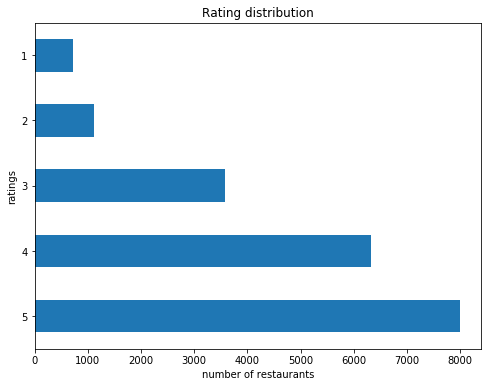

In [32]:
ax=df.Score.value_counts().\
   plot.barh(figsize=(8,6), title="Rating distribution");
ax.set(ylabel="ratings", xlabel="number of restaurants");

- __Analysis__: From the bar chart, we can see most restaurants are rated with full score, which indicates the overall popularity 
    of the restaurants are relatively high.

In [33]:
df['review length']=df['review'].apply(len)
df['review length']

0         384
1         261
2         329
3         715
4        1204
         ... 
19715     847
19716     183
19717     455
19718     766
19719     388
Name: review length, Length: 19720, dtype: int64

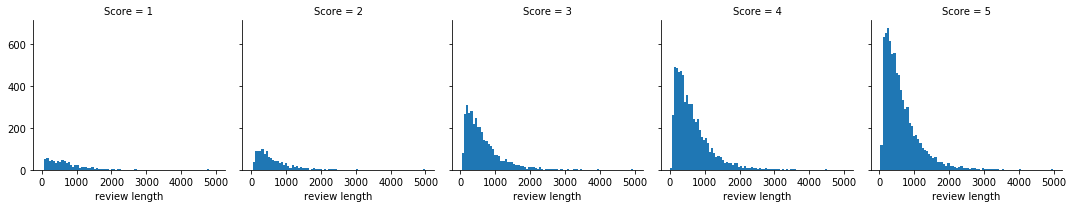

In [34]:
g = sns.FacetGrid(data=df,col='Score')
g.map(plt.hist,'review length',bins=80)

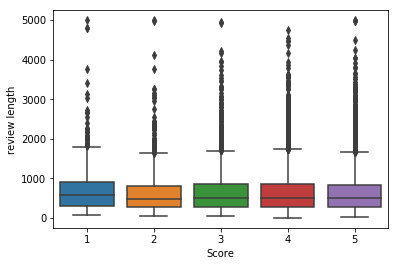

In [35]:
sns.boxplot(x='Score', y='review length', data=df)

In [36]:
data = pd.read_csv('processedData.csv',index_col=0)
scores=data.groupby('Score').mean()
corr=scores.corr()
corr
type(corr)

Unnamed: 0.1   Service      Time     Place  Delicious
Unnamed: 0.1      1.000000  0.567482 -0.617130  0.090145  -0.724998
Service           0.567482  1.000000 -0.343474  0.025403  -0.350391
Time             -0.617130 -0.343474  1.000000  0.580462   0.939213
Place             0.090145  0.025403  0.580462  1.000000   0.275068
Delicious        -0.724998 -0.350391  0.939213  0.275068   1.000000

pandas.core.frame.DataFrame

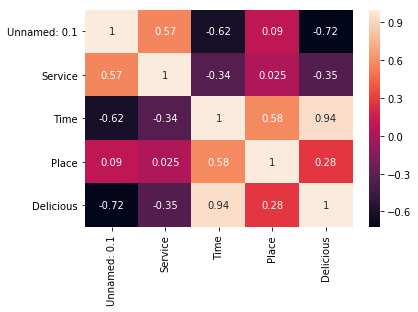

In [37]:
sns.heatmap(data=corr, annot=True)

# Analysis of top restaurants

([<matplotlib.patches.Wedge at 0x124654ba8>,
 [Text(-0.0742338552966172, 1.097492293698594, 'Score=3.0'),
  Text(-0.919342260531191, 0.603994874151594, 'Score=4.0'),
  Text(0.852755400625922, -0.6948440304869312, 'Score=5.0')],
 [Text(-0.040491193798154836, 0.598632160199233, '3.3%'),
  Text(-0.5014594148351951, 0.3294517495372331, '26.1%'),
  Text(0.46513930943232107, -0.3790058348110533, '70.7%')])

(-1.1099393322333313, 1.116844161024989, -1.117266617696898, 1.101432800204747)

Text(0.5, 1.0, 'Ratings of Peter Luger')

([<matplotlib.patches.Wedge at 0x12285f978>,
 [Text(-0.19101300726651582, 1.0832885262269707, 'Score=3.0'),
  Text(-1.0336619075216196, 0.37622208991334793, 'Score=4.0'),
  Text(0.9328530058282098, -0.5829110305331973, 'Score=5.0')],
 [Text(-0.10418891305446316, 0.5908846506692567, '6.7%'),
  Text(-0.5638155859208833, 0.2052120490436443, '26.7%'),
  Text(0.5088289122699327, -0.3179514711999258, '66.7%')])

(-1.1079821537837495,
 1.1061592783917158,
 -1.1058837920304752,
 1.1021967954796739)

Text(0.5, 1.0, 'Ratings of The Halal Guys')

([<matplotlib.patches.Wedge at 0x12291b748>,
 [Text(-0.03925176904349477, 1.0992994581218334, 'Score=2.0'),
  Text(-0.23165600733441466, 1.0753304116716302, 'Score=3.0'),
  Text(-1.0107767335764795, 0.4339704999887241, 'Score=4.0'),
  Text(0.9188785266641082, -0.6047001349723663, 'Score=5.0')],
 [Text(-0.021410055841906233, 0.5996178862482726, '2.2%'),
  Text(-0.126357822182408, 0.5865438609117982, '3.4%'),
  Text(-0.5513327637689887, 0.2367111818120313, '27.0%'),
  Text(0.5012064690895135, -0.32983643725765427, '67.4%')])

(-1.1029109137248638,
 1.1084615288880992,
 -1.1104991817174574,
 1.100722250836828)

Text(0.5, 1.0, "Ratings of Carmine's Italian Restaurant - Times Square")

([<matplotlib.patches.Wedge at 0x122961eb8>,
 [Text(-0.5416659071500699, 0.957391270605332, 'Score=3.0'),
  Text(-0.8784990569199831, -0.6619965309506541, 'Score=4.0'),
  Text(1.0949358116231616, 0.10543039611577272, 'Score=5.0')],
 [Text(-0.29545413117276537, 0.522213420330181, '17.5%'),
  Text(-0.47918130377453616, -0.361089016882175, '36.7%'),
  Text(0.5972377154308153, 0.057507488790421474, '45.8%')])

(-1.1125327401653258,
 1.1201274667581789,
 -1.1190377912751903,
 1.1070105041448632)

Text(0.5, 1.0, 'Ratings of Ippudo Westside')

([<matplotlib.patches.Wedge at 0x1229a1be0>,
 [Text(-0.23646748336504375, 1.0742826114719548, 'Score=3.0'),
  Text(-1.0855091676138522, -0.17796024001524083, 'Score=4.0'),
  Text(1.0983867562937033, -0.0595527799401273, 'Score=5.0')],
 [Text(-0.12898226365366022, 0.5859723335301571, '6.9%'),
  Text(-0.5920959096075556, -0.09706922182649498, '41.4%'),
  Text(0.5991200488874744, -0.032483334512796704, '51.7%')])

(-1.1235876574611172,
 1.1072933444904813,
 -1.1092703220534166,
 1.1004414439073056)

Text(0.5, 1.0, 'Ratings of Buddaken')

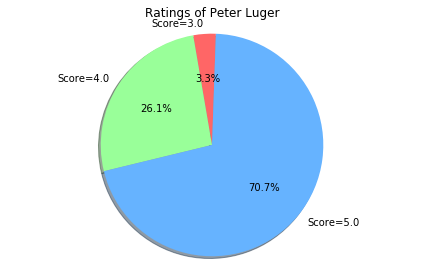

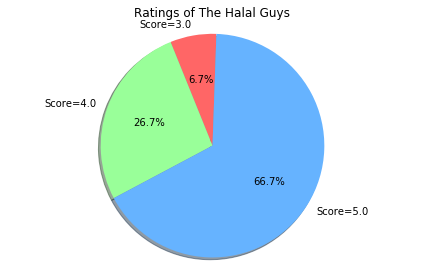

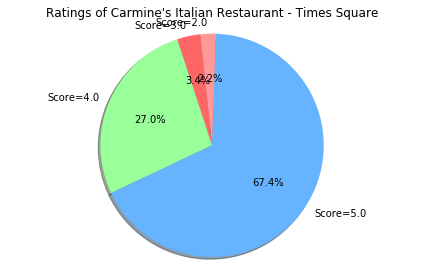

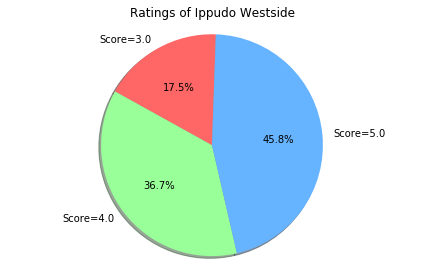

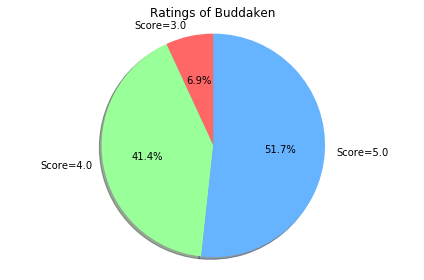

In [38]:
# get pie charts of top restaurants

# Peter Luger
df1= df[(df.Restaurant_Name == "Peter Luger")]
df1= df1[['Restaurant_Name','Score']]
df1=df1.groupby('Score').count()
# Pie chart
labels= ['Score=3.0', 'Score=4.0','Score=5.0']
sizes= [df1.iat[0,0]*3.0, df1.iat[1,0]*4.0, df1.iat[2,0]*5.0]
# add colors
colors= ['#ff6666','#99ff99','#66b3ff']
fig1,ax1= plt.subplots()
# explode 1st slice
explode= (0, 0, 0)
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=88)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Ratings of Peter Luger')
plt.tight_layout()



# The Halal Guys
df3= df[(df.Restaurant_Name == "The Halal Guys")]
df3= df3[['Restaurant_Name','Score']]
df3=df3.groupby('Score').count()
# Pie chart
labels= ['Score=3.0', 'Score=4.0','Score=5.0']
sizes= [df3.iat[0,0]*3.0, df3.iat[1,0]*4.0, df3.iat[2,0]*5.0]
# explode 1st slice
explode= (0, 0, 0) 
#add colors
colors= ['#ff6666','#99ff99','#66b3ff']
fig1, ax1= plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=88)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Ratings of The Halal Guys')
plt.tight_layout()

# Carmine's Italian Restaurant - Times Square 
df4= df[(df.Restaurant_Name == "Carmine's Italian Restaurant - Times Square")]
df4= df4[['Restaurant_Name','Score']]
df4=df4.groupby('Score').count()
# Pie chart
labels= ['Score=2.0', 'Score=3.0', 'Score=4.0', 'Score=5.0']
sizes= [df4.iat[0,0]*2.0, df4.iat[1,0]*3.0, df4.iat[2,0]*4.0,df4.iat[3,0]*5.0]
# explode 1st slice
explode= (0, 0, 0, 0) 
#add colors
colors= ['#ff9999','#ff6666','#99ff99','#66b3ff']
fig1, ax1= plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=88)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Ratings of Carmine\'s Italian Restaurant - Times Square')
plt.tight_layout()

#-Ippudo Westside 
# find all scores of The Metropolitan Museum of Art 
df5= df[(df.Restaurant_Name == "Ippudo Westside")]
df5= df5[['Restaurant_Name','Score']]
df5=df5.groupby('Score').count()
# Pie chart
labels= ['Score=3.0', 'Score=4.0', 'Score=5.0']
sizes= [df5.iat[1,0]*3.0, df5.iat[2,0]*4.0, df5.iat[2,0]*5.0]
# explode 1st slice
explode= (0, 0, 0) 
#add colors
colors= ['#ff6666','#99ff99','#66b3ff']
fig1, ax1= plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=88)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Ratings of Ippudo Westside')
plt.tight_layout()



# -Buddakan
df2= df[(df.Restaurant_Name == "Buddakan")]
df2= df2[['Restaurant_Name','Score']]
df2= df2.groupby('Score').count()
# Pie chart
labels= ['Score=3.0', 'Score=4.0', 'Score=5.0']
sizes= [df2.iat[0,0]*3.0, df2.iat[1,0]*4.0, df2.iat[2,0]*5.0]
# explode 1st slice
explode= (0, 0, 0) 
# add colors
colors= ['#ff6666','#99ff99','#66b3ff']
fig1,ax1= plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title('Ratings of Buddaken')
plt.tight_layout()

## Generate Wordcloud

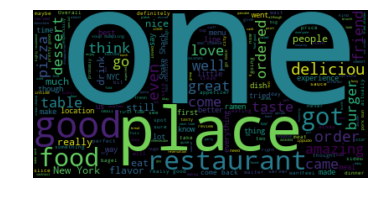

In [39]:
reviews = []
reviews = df.review
#print(reviews[0])
reviews = " ".join([i[ : ] for i in reviews])

#Generate a word cloud image
wordcloud = WordCloud().generate(reviews)

#Display the generated image:
wordcloud = WordCloud(max_font_size=200).generate(reviews);
plt.figure();
plt.imshow(wordcloud, interpolation="bilinear");
plt.axis("off");
plt.show();

## Positive & Negative & Total words in each comment

In [41]:
# Positive Words in comments
commentPositiveWordsList = df['lowerReview'].copy()
#print(df['tokenized_sents'])
reviewLists = df['lowerReview'].copy()
print(reviewLists[0:1])
for idx, review in enumerate(reviewLists):
    with open("positive-words.txt",'r') as f:
        positive_words=[line.strip() for line in f]
    #print(df["Score"][idx])
    #positive_words
    #print(positive_words)
    
    positive_tokens=[token for token in review \
                     if token in positive_words]
    #print(positive_tokens)
    commentPositiveWordsList[idx]=positive_tokens

0    [place, awesome, love, soup, broth, tasty, fla...
Name: lowerReview, dtype: object


In [42]:
PositiveCount = df['lowerReview'].copy()
for i in range(len(df['lowerReview'])):
    PositiveCount[i]=len(commentPositiveWordsList[i])

In [43]:
# Negative Words in comments
commentNegativeWordsList = df['lowerReview'].copy()
#print(df['tokenized_sents'])
reviewLists = df['lowerReview']
print(reviewLists[0:1])
for idx, review in enumerate(reviewLists):
    with open("negative-words.txt",'r') as f:
        negative_words=[line.strip() for line in f]
    #print(df["Score"][idx])
    #positive_words
    #print(positive_words)
    
    negative_tokens=[token for token in review \
                     if token in negative_words]
    #print(positive_tokens)
    commentNegativeWordsList[idx]=negative_tokens

0    [place, awesome, love, soup, broth, tasty, fla...
Name: lowerReview, dtype: object


In [44]:
NegativeCount = df['lowerReview'].copy()
for i in range(len(df['lowerReview'])):
    NegativeCount[i]=len(commentNegativeWordsList[i])

In [45]:
WordTotal = df['lowerReview'].copy()
for i in range(len(df['lowerReview'])):
    WordTotal[i]=len(df['lowerReview'][i])

#  Limit Data to Scope

In [135]:
# General-purpose Libraries
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import spacy
from time import time
%matplotlib inline

# Tools for processing data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, make_scorer, adjusted_rand_score, silhouette_score, homogeneity_score, normalized_mutual_info_score
# Classifiers, supervised and unsupervised
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

import warnings
warnings.filterwarnings("ignore")

In [118]:
# from skspark.model_selection import GridSearchCV as GSCV

In [47]:
# First ten restaurants with more than 50 reviews
print(df['Restaurant_Name'].value_counts()[df['Restaurant_Name'].value_counts()>50][-10:])

Ess-a-Bagel                                    680
Momofuku Noodle Bar                            680
Totto Ramen                                    680
Ippudo Westside                                680
The Halal Guys                                 680
Beauty & Essex                                 680
Lombardi's Pizza                               680
Carmine's Italian Restaurant - Times Square    680
Ippudo NY                                      680
Buddakan                                       680
Name: Restaurant_Name, dtype: int64


In [48]:
# Make a DataFrame with reviews by our chosen restaurants
# Include restaurant names and restaurant titles.

# Make a list of the 10 chosen restaurant names
names = df['Restaurant_Name'].value_counts()[df['Restaurant_Name'].value_counts()>50][-10:].index.tolist()

# DataFrame for reviews of all chosen restaurant
restaurant_data = pd.DataFrame()
for name in names:
    # Select each author's data
    articles = df[df['Restaurant_Name']==name][:100][['Restaurant_Name','lowerReview','review']]
    # Append it to the DataFrame
    restaurant_data = restaurant_data.append(articles)

restaurant_data = restaurant_data.reset_index().drop('index',1)
    
restaurant_data.head()

Restaurant_Name                                        lowerReview  \
0     Ess-a-Bagel  [entered, essabagel, shocked, long, slowmoving...   
1     Ess-a-Bagel  [endured, long, line, grab, breakfast, essabag...   
2     Ess-a-Bagel  [like, many, others, signature, toasted, every...   
3     Ess-a-Bagel  [actually, pretty, disappointed, essabagel, ca...   
4     Ess-a-Bagel  [im, bagel, girl, love, bagels, bagels, life, ...   

                                              review  
0  I entered Ess-a-Bagel, shocked at the long and...  
1  Endured the long line to grab breakfast at Ess...  
2  I like many others had the signature on a toas...  
3  I was actually pretty disappointed about Ess-a...  
4  I'm a bagel girl, I love bagels, bagels are my...

In [50]:
import spacy
t0 = time()

nlp = spacy.load('en')

# A list to store common words by all restaurants
common_words = []

# A dictionary to store the spacy_doc object of each restaurant
restaurant_docs = {}

for name in names:
    # Corpus is all the review for that restaurant
    corpus = ""
    # Grab all rows of restaurant, along the 'review' column
    restaurant_content = restaurant_data.loc[restaurant_data.Restaurant_Name==name,'review']

    for restaurant in restaurant_content:
        corpus = corpus + restaurant
   
    doc = nlp(corpus)
    
    # Store the doc in the dictionary
    restaurant_docs[name] = doc
        
    # Filter out punctuation and stop words.
    lemmas = [token.lemma_ for token in doc
                if not token.is_punct and not token.is_stop]
        
    # Return the most common words of that restaurant's corpus.
    bow = [item[0] for item in Counter(lemmas).most_common(1000)]
  
    for word in bow:
        common_words.append(word)

# Eliminate duplicates
common_words = set(common_words)
    
print('Total number of common words:',len(common_words))
print("done in %0.3fs" % (time() - t0))

Total number of common words: 3935
done in 43.942s


In [81]:
type(doc)

spacy.tokens.doc.Doc

In [76]:
common_words

{'face',
 'SIGNATURE',
 'circle',
 'FAVORITE',
 'impressed',
 'ship',
 'dark',
 'warning',
 'specialize',
 'valentine',
 'cruise',
 'Boston',
 'fuss',
 'NYC.I',
 '1.I',
 'kakuni',
 'review',
 'location',
 'charred',
 'A+',
 'diced',
 'instruction',
 'crab',
 'chorizo',
 'dressing',
 'degree',
 'momofuku',
 'boil',
 'fall',
 'trout',
 'sadly',
 'para',
 'kale',
 'wavy',
 'inclusivity',
 'reference',
 'jokingly',
 'luckily',
 'yolk',
 'satisfy',
 'culinary',
 'looking',
 'monster',
 'FYI',
 'right',
 'bench',
 'windy',
 'able',
 'donut',
 'patron',
 'tan',
 'peak',
 'cherry',
 'wild',
 'complain',
 'Pepperoni',
 'downtown',
 'wheel',
 'Chris',
 'Sum',
 'reception',
 'female',
 'ty',
 'crumb',
 'consistently',
 'trying!cash',
 'restaurant',
 'reminiscent',
 'bowl',
 'ideal',
 'inspiring',
 'employee',
 'noodle',
 'row',
 'enjoyable',
 'thang',
 'Fries',
 'chive',
 'desu',
 'believe',
 'quarter',
 'cream',
 'Ichiran',
 'wait!damn',
 'general',
 '2019',
 'Sunday',
 'observation',
 'herb',
 

In [52]:
# Let's see our 10 restaurants in the dictionary
lengths = []
for k,v in restaurant_docs.items():
    print(k,'corpus contains',len(v),' words.')
    lengths.append(len(v))

Ess-a-Bagel corpus contains 15201  words.
Momofuku Noodle Bar corpus contains 18543  words.
Totto Ramen corpus contains 16169  words.
Ippudo Westside corpus contains 16583  words.
The Halal Guys corpus contains 14632  words.
Beauty & Essex corpus contains 20624  words.
Lombardi's Pizza corpus contains 14798  words.
Carmine's Italian Restaurant - Times Square corpus contains 16129  words.
Ippudo NY corpus contains 17561  words.
Buddakan corpus contains 19547  words.


Text(0.5, 1.0, 'Word Count per Restaurant in Chosen Data')

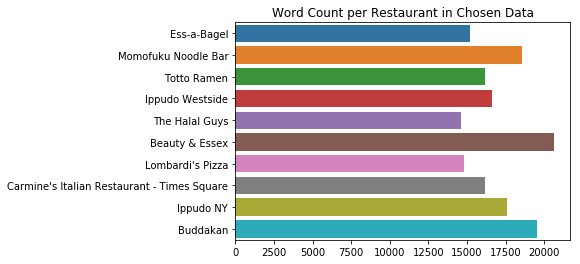

In [53]:
sns.barplot(x=lengths,y=names,orient='h')
plt.title('Word Count per Restaurant in Chosen Data')
plt.show()

# Part 3-Modeling

## Pick 50 reviews for each of the top 10 restaurants to train model

In [90]:
bow_counts = pd.DataFrame()
for name in names:
    # Select X articles of that restaurant
    articles = restaurant_data.loc[restaurant_data.Restaurant_Name==name,:][:50]
    bow_counts = bow_counts.append(articles)
bow_counts = bow_counts.reset_index().drop('index',1)

# Use common_words as the columns of a temporary DataFrame
df = pd.DataFrame(columns = common_words)
print(df.columns)

Index(['face', 'SIGNATURE', 'circle', 'FAVORITE', 'impressed', 'ship', 'dark',
       'warning', 'specialize', 'valentine',
       ...
       'BF', 'Serve', 'Monday', 'try-', 'Brewery', 'oily', 'BBQ', 'Edamames',
       'holy', 'raisin'],
      dtype='object', length=3934)


In [91]:
articles

Restaurant_Name                                        lowerReview  \
900        Buddakan  [holy, moly, buddakan, good, friend, takes, fa...   
901        Buddakan  [buddakan, everyone, whos, city, imagines, nyc...   
902        Buddakan  [liked, buddakan, much, went, back, birthday, ...   
903        Buddakan  [reservation, early, work, dinner, place, fill...   
904        Buddakan  [came, tuesday, night, birthday, dinner, overa...   
905        Buddakan  [located, building, chelsea, market, buddakan,...   
906        Buddakan  [wowza, still, dream, restaurant, atmosphere, ...   
907        Buddakan  [perfection, start, finish, also, absolute, go...   
908        Buddakan  [almost, 4000, reviews, restaurant, many, peop...   
909        Buddakan  [thursday, night, finally, went, dinner, im, g...   
910        Buddakan  [wow, wow, place, stunning, service, wonderful...   
911        Buddakan  [visiting, nyc, place, mustmake, sure, reserva...   
912        Buddakan  [tuna, tartare, spring, rolls, 55, another, am...   
913        Buddakan  [best, part, restaurant, ambiance, food, overp...   
914        Buddakan  [let, start, saying, buddakan, grand, got, los...   
915        Buddakan  [awesome, place, dinner, friends, definitely, ...   
916        Buddakan  [buddakan, snapping, fingers, diamond, rough, ...   
917        Buddakan  [probably, todo, list, since, last, three, yea...   
918        Buddakan  [ive, known, buddakan, heard, great, things, r...   
919        Buddakan  [last, night, celebrated, birthday, family, gr...   
920        Buddakan  [reservations, birthday, saturday, made, seem,...   
921        Buddakan  [delight, experience, made, reservation, late,...   
922        Buddakan  [love, coming, buddakan, high, ceilings, grand...   
923        Buddakan  [really, enjoyed, experience, first, glance, t...   
924        Buddakan  [buddakan, one, first, restaurants, kind, big,...   
925        Buddakan  [every, item, ordered, good, service, good, ha...   
926        Buddakan  [option, 6, stars, buddakan, deserves, visited...   
927        Buddakan  [time, favorite, restaurant, gluten, free, din...   
928        Buddakan  [one, best, greenwich, village, fun, intimate,...   
929        Buddakan  [ive, several, times, past, several, years, st...   
930        Buddakan  [buddakan, feels, like, ancient, asian, underg...   
931        Buddakan  [let, start, saying, really, wanted, like, pla...   
932        Buddakan  [buddakan, one, favorite, restaurants, city, t...   
933        Buddakan  [ahhhh, buddakan, epitome, splendor, flamboyan...   
934        Buddakan  [wow, experience, everything, point, venue, se...   
935        Buddakan  [came, friends, birthday, enjoyed, need, play,...   
936        Buddakan  [arrive, bit, early, wait, party, show, ordere...   
937        Buddakan  [restaurant, sells, experience, delivered, men...   
938        Buddakan  [boyfriend, made, reservation, buddakan, speci...   
939        Buddakan  [wow, didnt, know, expect, coming, business, f...   
940        Buddakan  [reserved, late, dinner, first, night, nyc, de...   
941        Buddakan  [great, place, business, dinners, date, night,...   
942        Buddakan  [buddakan, remains, one, favorite, restaurants...   
943        Buddakan  [couple, summers, ago, came, buddakan, first, ...   
944        Buddakan  [came, sunday, 930pm, reservation, light, crow...   
945        Buddakan  [really, special, occasion, restaurant, decor,...   
946        Buddakan  [love, place, go, place, amazing, drinks, dump...   
947        Buddakan  [place, perfect, like, pompous, assholish, peo...   
948        Buddakan  [great, dinner, drink, spot, couples, groups, ...   
949        Buddakan  [carrie, bradshaw, rehearsal, dinnerand, see, ...   

                                                review  
900  Holy moly is Buddakan good! My friend takes he...  
901  Buddakan is what everyone who's not from the c...  
902  I liked Buddakan so much that I went back for ...  
9

In [92]:
if 'Restaurant_Name' in common_words:
    common_words.remove('Restaurant_Name')
if 'lowerReview' in common_words:
    common_words.remove('lowerReview')
if 'review' in common_words:
    common_words.remove('review')

In [93]:
# Count the number of times a common_word appears in each review
# (about 2.5Hrs processing)

bow_counts = pd.DataFrame()
for name in names:
    # SSelect X articles of that restaurant
    articles = restaurant_data.loc[restaurant_data.Restaurant_Name==name,:][:50]
    bow_counts = bow_counts.append(articles)
bow_counts = bow_counts.reset_index().drop('index',1)

# Use common_words as the columns of a temporary DataFrame
df = pd.DataFrame(columns=common_words)
print(df)
# Join BOW features with reviews
bow_counts = bow_counts.join(df)

# Initialize rows with zeroes
bow_counts.loc[:,common_words] = 0

# Fill the DataFrame with counts of each feature in each review
t0 = time()
for i, article in enumerate(bow_counts.review):
    doc = nlp(article)
    for token in doc:
        if token.lemma_.lower() in common_words:
            bow_counts.loc[i,token.lemma_.lower()] += 1
    # Print a message every X articles
    if i % 50 == 0:
        if time()-t0 < 3600: # if less than an hour in seconds
            print("Article ",i," done after ",(time()-t0)/60,' minutes.')
        else:
            print("Article ",i," done after ",(time()-t0)/60/60,' hours.')

Empty DataFrame
Columns: [face, SIGNATURE, circle, FAVORITE, impressed, ship, dark, warning, specialize, valentine, cruise, Boston, fuss, NYC.I, 1.I, kakuni, location, charred, A+, diced, instruction, crab, chorizo, dressing, degree, momofuku, boil, fall, trout, sadly, para, kale, wavy, inclusivity, reference, jokingly, luckily, yolk, satisfy, culinary, looking, monster, FYI, right, bench, windy, able, donut, patron, tan, peak, cherry, wild, complain, Pepperoni, downtown, wheel, Chris, Sum, reception, female, ty, crumb, consistently, trying!cash, restaurant, reminiscent, bowl, ideal, inspiring, employee, noodle, row, enjoyable, thang, Fries, chive, desu, believe, quarter, cream, Ichiran, wait!damn, general, 2019, Sunday, observation, herb, slushee, NY!The, breakfast, St., pull, aroma, normal, ginger, reservation, Skip, def, machine, ...]
Index: []

[0 rows x 3934 columns]
Article  0  done after  0.09814298152923584  minutes.
Article  50  done after  5.01793581644694  minutes.
Article  

In [176]:
bow_counts.head()

Restaurant_Name                                        lowerReview  \
0     Ess-a-Bagel  [entered, essabagel, shocked, long, slowmoving...   
1     Ess-a-Bagel  [endured, long, line, grab, breakfast, essabag...   
2     Ess-a-Bagel  [like, many, others, signature, toasted, every...   
3     Ess-a-Bagel  [actually, pretty, disappointed, essabagel, ca...   
4     Ess-a-Bagel  [im, bagel, girl, love, bagels, bagels, life, ...   

                                              review face SIGNATURE circle  \
0  I entered Ess-a-Bagel, shocked at the long and...    0         0      0   
1  Endured the long line to grab breakfast at Ess...    0         0      0   
2  I like many others had the signature on a toas...    0         0      0   
3  I was actually pretty disappointed about Ess-a...    0         0      0   
4  I'm a bagel girl, I love bagels, bagels are my...    0         0      0   

  FAVORITE impressed ship dark  ... BF Serve Monday try- Brewery oily BBQ  \
0        0         0    0    0  ...  0     0      0    0       0    0   0   
1        0         0    0    0  ...  0     0      0    0       0    0   0   
2        0         0    0    0  ...  0     0      0    0       0    0   0   
3        0         0    0    0  ...  0     0      0    0       0    0   0   
4        0         0    0    0  ...  0     0      0    0       0    0   0   

  Edamames holy raisin  
0        0    0      0  
1        0    0      0  
2        0    0      0  
3        0    0      0  
4        0    0      0  

[5 rows x 3937 columns]

In [182]:
bow_counts.to_csv('bow_counts_2.csv')

In [177]:
# Establish outcome and predictors
y = bow_counts['Restaurant_Name']
X = bow_counts.drop(['lowerReview','review','Restaurant_Name'], 1)
 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.24,
                                                    random_state=0,
                                                    stratify=y)
# Make sure classes are balanced after train-test-split
y_test.value_counts()

Beauty & Essex                                 12
Ippudo NY                                      12
Momofuku Noodle Bar                            12
The Halal Guys                                 12
Ess-a-Bagel                                    12
Totto Ramen                                    12
Lombardi's Pizza                               12
Buddakan                                       12
Ippudo Westside                                12
Carmine's Italian Restaurant - Times Square    12
Name: Restaurant_Name, dtype: int64

In [178]:
from pyspark.ml.classification import LogisticRegression

In [179]:
import numpy as np
cols = X.columns.values.tolist()
bow_counts[cols] = bow_counts[cols].replace({'0':np.nan, 0:np.nan})

In [184]:
bow_counts.drop(['lowerReview','review'],1).

Restaurant_Name  face  SIGNATURE  circle  FAVORITE  impressed  ship  dark  \
0       Ess-a-Bagel   NaN        NaN     NaN       NaN        NaN   NaN   NaN   
1       Ess-a-Bagel   NaN        NaN     NaN       NaN        NaN   NaN   NaN   
2       Ess-a-Bagel   NaN        NaN     NaN       NaN        NaN   NaN   NaN   
3       Ess-a-Bagel   NaN        NaN     NaN       NaN        NaN   NaN   NaN   
4       Ess-a-Bagel   NaN        NaN     NaN       NaN        NaN   NaN   NaN   
..              ...   ...        ...     ...       ...        ...   ...   ...   
495        Buddakan   NaN        NaN     NaN       NaN        NaN   NaN   NaN   
496        Buddakan   NaN        NaN     NaN       NaN        NaN   NaN   NaN   
497        Buddakan   NaN        NaN     NaN       NaN        NaN   NaN   NaN   
498        Buddakan   NaN        NaN     NaN       NaN        NaN   NaN   NaN   
499        Buddakan   NaN        NaN     NaN       NaN        NaN   NaN   NaN   

     warning  specialize  ...  BF  Serve  Monday  try-  Brewery  oily  BBQ  \
0        NaN         NaN  ... NaN    NaN     NaN   NaN      NaN   NaN  NaN   
1        NaN         NaN  ... NaN    NaN     NaN   NaN      NaN   NaN  NaN   
2        NaN         NaN  ... NaN    NaN     NaN   NaN      NaN   NaN  NaN   
3        NaN         NaN  ... NaN    NaN     NaN   NaN      NaN   NaN  NaN   
4        NaN         NaN  ... NaN    NaN     NaN   NaN      NaN   NaN  NaN   
..       ...         ...  ...  ..    ...     ...   ...      ...   ...  ...   
495      NaN         NaN  ... NaN    NaN     NaN   NaN      NaN   1.0  NaN   
496      NaN         NaN  ... NaN    NaN     NaN   NaN      NaN   NaN  NaN   
497      NaN         NaN  ... NaN    NaN     NaN   NaN      NaN   NaN  NaN   
498      NaN         NaN  ... NaN    NaN     NaN   NaN      NaN   NaN  NaN   
499      NaN         NaN  ... NaN    NaN     NaN   NaN      NaN   NaN  NaN   

     Edamames  holy  raisin  
0         NaN   NaN     NaN  
1         NaN   NaN     NaN  
2         NaN   NaN     NaN  
3         NaN   NaN     NaN  
4         NaN   NaN     NaN  
..        ...   ...     ...  
495       NaN   NaN     NaN  
496       NaN   NaN     NaN  
497       NaN   NaN     NaN  
498       NaN   NaN     NaN  
499       NaN   NaN     NaN  

[500 rows x 3935 columns]

In [175]:
y

0      Ess-a-Bagel
1      Ess-a-Bagel
2      Ess-a-Bagel
3      Ess-a-Bagel
4      Ess-a-Bagel
          ...     
495       Buddakan
496       Buddakan
497       Buddakan
498       Buddakan
499       Buddakan
Name: Restaurant_Name, Length: 500, dtype: object

In [161]:
# Store our results in a DataFrame
metrics = ['Algorithm','n_train','Features','ARI','Homogeneity',
           'Silhouette','Mutual_Info','Cross_Val','Train_Accuracy',
           'Test_Accuracy']
performance = pd.DataFrame(columns=metrics)

In [162]:
def score_optimization(clf,params,features,i):
    t0 = time()
    # Heading
    print('\n','-'*40,'\n',clf.__class__.__name__,'\n','-'*40)
    
    # Find best parameters based on scoring of choice
    score = make_scorer(normalized_mutual_info_score)
    search = GridSearchCV(clf,params,
                          scoring=score,cv=3).fit(X,y)
    

    # Extract best estimator
    best = search.best_estimator_
    print("Best parameters:",search.best_params_)

    # Cross-validate on all the data
    cv = cross_val_score(X=X,y=y,estimator=best,cv=5)
    print("\nCross-val scores(All Data):",cv)
    print("Mean cv score:",cv.mean())
    performance.loc[i,'Cross_Val'] = cv.mean() 
    
    # Get train accuracy
    best = best.fit(X_train,y_train)
    print("=====================")
    print(best)
    print("=====================")
    train = best.score(X=X_train,y=y_train)
    performance.loc[i,'Train_Accuracy'] = train 
    print("\nTrain Accuracy Score:",train)

    # Get test accuracy
    test = best.score(X=X_test,y=y_test)
    performance.loc[i,'Test_Accuracy'] = test 
    print("\nTest Accuracy Score:",test)
    
    y_pred = best.predict(X_test)
    
    ari = adjusted_rand_score(y_test, y_pred)
    performance.loc[i,'ARI'] = ari 
    print("\nAdjusted Rand-Index: %.3f" % ari)
    
    hom = homogeneity_score(y_test,y_pred)
    performance.loc[i,'Homogeneity'] = hom
    print("Homogeneity Score: %.3f" % hom)
    
    sil = silhouette_score(X_test,y_pred)
    performance.loc[i,'Silhouette'] = sil
    print("Silhouette Score: %.3f" % sil)
    
    nmi = normalized_mutual_info_score(y_test,y_pred)
    performance.loc[i,'Mutual_Info'] = nmi
    print("Normed Mutual-Info Score: %.3f" % nmi)

    #print(classification_report(y_test, y_pred))

    conf_matrix = pd.crosstab(y_test,y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
    plt.show()
    
    performance.loc[i,'n_train'] = len(X_train)
    performance.loc[i,'Features'] = features
    performance.loc[i,'Algorithm'] = clf.__class__.__name__
    print(time()-t0,'seconds.')

In [146]:
import random
from random import sample

In [148]:
# record for time taken under different algorithms:
Time_Record= pd.DataFrame(columns=['Algorithm','10%','30%','50%','70%','90%'])
Time_Record.Algorithm=['LogR','RanF','GB','KNN','NB']

In [172]:
def Time_cutoff_data(clf,params,features,i):
    random.seed(5)
    mm=[.1,.3,.5,.7,.9]
    for m in mm:
#         feature =pd.DataFrame(features).iloc[sample(range(len(feature)),round(m*len(feature))),:]
        X0 = pd.DataFrame(random.sample(list(X), m * len(X)), columns=X.columns.values.tolist()) 
        y0 = pd.DataFrame(random.sample(list(y), m * len(y)), columns=y.columns.values.tolist())
    
        t0 = time()
        # Heading
        #print('\n','-'*40,'\n',clf.__class__.__name__,'\n','-'*40)
    
        # Find best parameters based on scoring of choice
        score = make_scorer(normalized_mutual_info_score)
        search = GridSearchCV(clf,params,
                              scoring=score,cv=3).fit(X0,y0)
        # Extract best estimator
        best = search.best_estimator_
        #print("Best parameters:",search.best_params_)

        # Cross-validate on all the data
        cv = cross_val_score(X=X0,y=y0,estimator=best,cv=5)
        #print("\nCross-val scores(All Data):",cv)
        #print("Mean cv score:",cv.mean())
        #performance.loc[i,'Cross_Val'] = cv.mean() 
    
        # Get train accuracy
        best = best.fit(X_train,y_train)
        train = best.score(X=X_train,y=y_train)
        performance.loc[i,'Train_Accuracy'] = train 
        #print("\nTrain Accuracy Score:",train)

        # Get test accuracy
        test = best.score(X=X_test,y=y_test)
        performance.loc[i,'Test_Accuracy'] = test 
        #print("\nTest Accuracy Score:",test)
    
        y_pred = best.predict(X_test)
    
        ari = adjusted_rand_score(y_test, y_pred)
        performance.loc[i,'ARI'] = ari 
        #print("\nAdjusted Rand-Index: %.3f" % ari)
    
        hom = homogeneity_score(y_test,y_pred)
        performance.loc[i,'Homogeneity'] = hom
        #print("Homogeneity Score: %.3f" % hom)
    
        sil = silhouette_score(X_test,y_pred)
        #performance.loc[i,'Silhouette'] = sil
        #print("Silhouette Score: %.3f" % sil)
    
        nmi = normalized_mutual_info_score(y_test,y_pred)
        #performance.loc[i,'Mutual_Info'] = nmi
        #print("Normed Mutual-Info Score: %.3f" % nmi)

        #print(classification_report(y_test, y_pred))

        conf_matrix = pd.crosstab(y_test,y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
        #plt.show()
    
        #performance.loc[i,'n_train'] = len(X_train)
        #performance.loc[i,'Features'] = features
        #performance.loc[i,'Algorithm'] = clf.__class__.__name__
        print(time()-t0,'seconds.'+'of '+str(m*100)+'%'+' data')                            
        Time_Record.iloc[i-1,mm.index(m)+1]=time()-t0
        

In [152]:
import pandas as pd

# Logistic Regression


 ---------------------------------------- 
 LogisticRegression 
 ----------------------------------------
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Cross-val scores(All Data): [0.78 0.76 0.73 0.74 0.71]
Mean cv score: 0.744

Train Accuracy Score: 1.0

Test Accuracy Score: 0.75

Adjusted Rand-Index: 0.547
Homogeneity Score: 0.703
Silhouette Score: -0.075
Normed Mutual-Info Score: 0.705


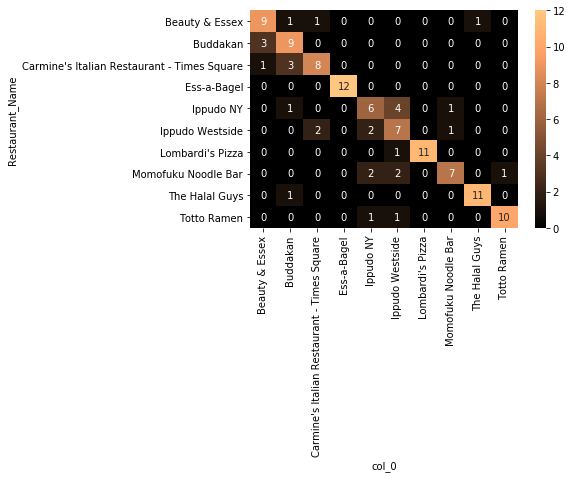

519.2437419891357 seconds.


In [98]:
# Parameters to optimize
params = [{
    'solver': ['newton-cg', 'lbfgs', 'sag'],
    'C': [0.3, 0.5, 0.7, 1],
    'penalty': ['l2']
    },{
    'solver': ['liblinear','saga'],
    'C': [0.3, 0.5, 0.7, 1],
    'penalty': ['l1','l2']
}]

clf = LogisticRegression(
    n_jobs=-1 # Use all CPU
)

score_optimization(clf=clf,params=params,features='BOW',i=1)

In [155]:
Time_cutoff_data(clf=clf,params=params,features='BOW',i=1)

ValueError: DataFrame constructor not properly called!

In [108]:
from pyspark.ml.classification import LogisticRegression

# Random Forest


 ---------------------------------------- 
 RandomForestClassifier 
 ----------------------------------------
Best parameters: {'criterion': 'gini'}

Cross-val scores(All Data): [0.76 0.77 0.67 0.74 0.74]
Mean cv score: 0.7360000000000001

Train Accuracy Score: 1.0

Test Accuracy Score: 0.6916666666666667

Adjusted Rand-Index: 0.504
Homogeneity Score: 0.656
Silhouette Score: -0.073
Normed Mutual-Info Score: 0.661


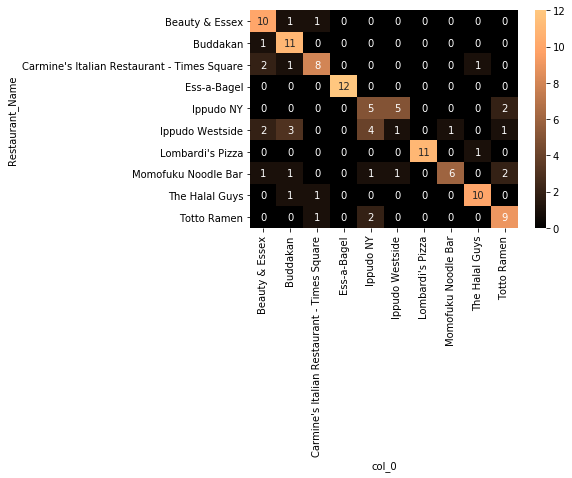

40.92689514160156 seconds.


In [99]:
# Parameters to compare
params = {
    'criterion':['entropy','gini'],
}

# Implement the classifier
clf = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_features=None,
    n_jobs=-1,
)

score_optimization(clf=clf,params=params,features='BOW',i=2)

In [ ]:
Time_cutoff_data(clf=clf,params=params,features='BOW',i=2)

# Gradient Boosting


 ---------------------------------------- 
 GradientBoostingClassifier 
 ----------------------------------------
Best parameters: {'learning_rate': 0.3}

Cross-val scores(All Data): [0.73 0.62 0.66 0.75 0.71]
Mean cv score: 0.6940000000000001

Train Accuracy Score: 1.0

Test Accuracy Score: 0.7083333333333334

Adjusted Rand-Index: 0.579
Homogeneity Score: 0.766
Silhouette Score: -0.086
Normed Mutual-Info Score: 0.786


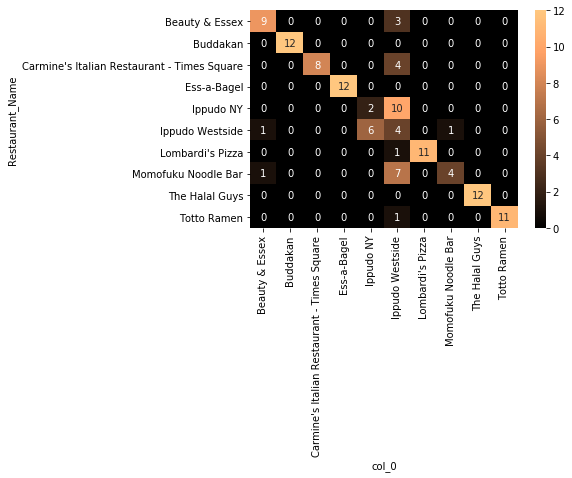

196.7054042816162 seconds.


In [103]:
# Parameters to compare
params = {
    'learning_rate':[0.3,0.5,0.7,1]
}

# Implement the classifier
clf = ensemble.GradientBoostingClassifier(
    max_features=None
)

score_optimization(clf=clf,params=params,features='BOW',i=3)

In [ ]:
Time_cutoff_data(clf=clf,params=params,features='BOW',i=3)

# KNN


 ---------------------------------------- 
 KNeighborsClassifier 
 ----------------------------------------
Best parameters: {'n_neighbors': 23}

Cross-val scores(All Data): [0.48 0.38 0.47 0.43 0.45]
Mean cv score: 0.442

Train Accuracy Score: 0.5421052631578948

Test Accuracy Score: 0.4083333333333333

Adjusted Rand-Index: 0.172
Homogeneity Score: 0.378
Silhouette Score: -0.044
Normed Mutual-Info Score: 0.392


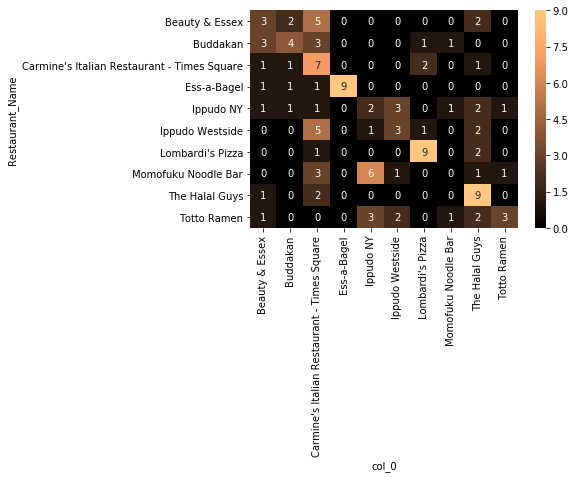

629.5112130641937 seconds.


In [104]:
from sklearn.neighbors import KNeighborsClassifier
# Parameters to compare
params = {
    'n_neighbors':list(range(100))[1:]
}

# Implement the classifier
clf = KNeighborsClassifier(
    n_jobs=-1
)

score_optimization(clf=clf,params=params,features='BOW',i=4)

In [ ]:
Time_cutoff_data(clf=clf,params=params,features='BOW',i=4)

# Multinomial Naive Bayes


 ---------------------------------------- 
 MultinomialNB 
 ----------------------------------------
Best parameters: {'alpha': 0.5, 'class_prior': None, 'fit_prior': True}

Cross-val scores(All Data): [0.84 0.77 0.73 0.79 0.84]
Mean cv score: 0.7939999999999999
MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

Train Accuracy Score: 0.9921052631578947

Test Accuracy Score: 0.7916666666666666

Adjusted Rand-Index: 0.630
Homogeneity Score: 0.767
Silhouette Score: -0.077
Normed Mutual-Info Score: 0.770


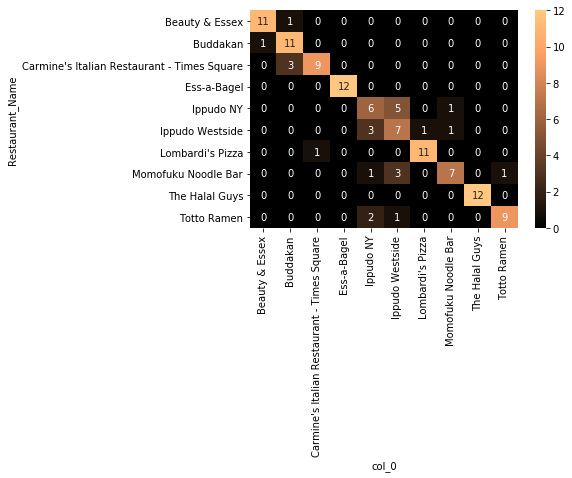

26.652637243270874 seconds.


In [167]:
from sklearn.naive_bayes import MultinomialNB
# Parameters to compare
params = {
    'alpha':[0,0.5,1.0],
    'class_prior':[None],
    'fit_prior':[True,False],
}

# Implement the classifier
clf = MultinomialNB()

score_optimization(clf=clf,params=params,features='BOW',i=5)

In [173]:
Time_cutoff_data(clf=clf,params=params,features='BOW',i=5)

TypeError: can't multiply sequence by non-int of type 'float'

In [112]:
# from pyspark.ml.classification import NaiveBayes
# clf = NaiveBayes(smoothing=1.0, modelType="multinomial")

# # Parameters to compare
# params = {
#     'alpha':[0,0.5,1.0],
#     'class_prior':[None],
#     'fit_prior':[True,False],
# }

# score_optimization(clf=clf,params=params,features='BOW',i=5)


 ---------------------------------------- 
 NaiveBayes 
 ----------------------------------------


TypeError: Cannot clone object 'NaiveBayes_a8e825387d0f' (type <class 'pyspark.ml.classification.NaiveBayes'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [141]:
performance.iloc[:6].sort_values('Mutual_Info',ascending=False)[['Algorithm','n_train','Features','Mutual_Info','Test_Accuracy']]

Algorithm n_train Features Mutual_Info Test_Accuracy
3  GradientBoostingClassifier     380      BOW    0.785997      0.708333
5               MultinomialNB     380      BOW    0.769789      0.791667
1          LogisticRegression     380      BOW    0.704745          0.75
2      RandomForestClassifier     380      BOW    0.661218      0.691667
4        KNeighborsClassifier     380      BOW    0.391851      0.408333

In [ ]:
# show our time record table
print(Time_Record)

In [185]:
from pyspark.ml.classification import LogisticRegression

t0 = time()
# Load training data
training = spark \
    .read \
    .format("libsvm") \
    .load("libsvm_1.data")

lr = LogisticRegression(maxIter=100, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))
print(time()-t0,'seconds.')

Coefficients: 
10 X 3934 CSRMatrix
(0,165) 0.04
Intercept: [-0.015388312288155098,0.0017098124764601532,0.0017098124764628735,0.00170981247646282,0.001709812476462688,0.0017098124764626194,0.0017098124764628336,0.001709812476462968,0.001709812476460223,0.0017098124764579217]
objectiveHistory:
2.3025850929940503
2.302531649174686
2.302333164280644
2.302330083175132
2.3023219740290326
2.3023216177235195
2.302321608658401
2.302321602978383
2.302321602742357
False positive rate by label:
label 0: 0.0
label 1: 0.0
label 2: 0.0
label 3: 0.0
label 4: 0.0
label 5: 0.0
label 6: 0.0
label 7: 0.8911111111111111
label 8: 0.0
label 9: 0.0
True positive rate by label:
label 0: 0.98
label 1: 0.0
label 2: 0.0
label 3: 0.0
label 4: 0.0
label 5: 0.0
label 6: 0.0
label 7: 1.0
label 8: 0.0
label 9: 0.0
Precision by label:
label 0: 1.0
label 1: 0.0
label 2: 0.0
label 3: 0.0
label 4: 0.0
label 5: 0.0
label 6: 0.0
label 7: 0.11086474501108648
label 8: 0.0
label 9: 0.0
Recall by label:
label 0: 0.98
label 1: 